## Boston Gender with Python!!! and machine learning!!!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import csv
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt



In [2]:
#from https://pypi.python.org/pypi/gender-guesser/0.4.0
#uses python 3 

import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))

print(d.get_gender(u"Sally"))

print(d.get_gender(u"Pauley")) # should be androgynous


male
female
andy


In [3]:
#import the csv i downloaded from the website with the names -- could robotize this later..
# they have an API https://data.cityofboston.gov/Finance/Employee-Earnings-Report-2015/ah28-sywy
pay_2016 = pd.read_csv("Employee_Earnings_Report_2016.csv")

#pay_2015 = pd.read_csv("Employee_Earnings_Report_2015.csv")
#pay_2014 = pd.read_csv("Employee_Earnings_Report_2014.csv")
#pay_2016.head()

In [4]:
#ay_2016.info()
#pay_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21902 entries, 0 to 21901
Data columns (total 12 columns):
NAME                         21902 non-null object
DEPARTMENT_NAME              21902 non-null object
TITLE                        21902 non-null object
REGULAR                      21902 non-null object
RETRO                        21902 non-null object
OTHER                        21902 non-null object
OVERTIME                     21902 non-null object
INJURED                      21902 non-null object
DETAILS                      21902 non-null object
QUINN/EDUCATION INCENTIVE    21902 non-null object
TOTAL EARNINGS               21902 non-null object
POSTAL                       21900 non-null object
dtypes: object(12)
memory usage: 2.0+ MB


In [5]:
#pay_2014.head(10)
pay_2015.head(10)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAILS,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,$44006.26,$0.00,$275.00,$324.12,$0.00,$0.00,$0.00,$44605.38,02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,$-886.20,$0.00,$8088.35,$544.83,$81996.78,$0.00,$20667.80,$110411.56,02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,$101468.29,$0.00,$550.00,$15146.51,$0.00,$5168.00,$0.00,$122332.80,02132
3,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,$42919.31,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$42919.31,02481
4,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,$39768.17,$0.00,$126.00,$13974.97,$0.00,$0.00,$0.00,$53869.14,02127
5,"Abbott,John R.",BPS Snowden International Hi,Teacher,$98938.55,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$98938.55,02445
6,"Abbruzzese,Donna",BPS Clap Elementary,Lunch Hour Monitors,$8873.97,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$8873.97,02125
7,"Abdalkhallaq,Amira N.",BPS O'Bryant School,Teacher,$106848.84,$0.00,$340.00,$0.00,$0.00,$0.00,$0.00,$107188.84,02121
8,"Abdal-Khallaq,Musiri Kari",Green Academy,Teacher,$84249.74,$0.00,$3712.28,$0.00,$0.00,$0.00,$0.00,$87962.02,02119
9,"Abdal-Khallaq,Naima",BPS Charlestown High,Teacher,$88539.63,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$88539.63,02121


what would I like to do now? for the graphic, I need to genderize, and then pick the top 100 people by pay.
the genderizer uses first name,so I need to make a column of first names..Ill start with the 2016 data set and aim to have this done soon to update my graphic...
...Ill have to experiment a bit with the genderizer so will pull out 20 names to test them..

In [7]:
#d_2016 = pay_2016 #copying the dataset to avoid changes
d_2015 = pay_2015
#d_2014 = pay_2014


#d_2016['regular'] = (d_2016['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float))
#d_2016 = d_2016.rename(columns = {
#'REGULAR':"regular",
#"RETRO": "retro",})
                       
                       
#d_2016.head()
d_2015.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAILS,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Abadi,Kidani A",Assessing Department,Property Officer,$44006.26,$0.00,$275.00,$324.12,$0.00,$0.00,$0.00,$44605.38,02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,$-886.20,$0.00,$8088.35,$544.83,$81996.78,$0.00,$20667.80,$110411.56,02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,$101468.29,$0.00,$550.00,$15146.51,$0.00,$5168.00,$0.00,$122332.80,02132
3,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,$42919.31,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$42919.31,02481
4,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,$39768.17,$0.00,$126.00,$13974.97,$0.00,$0.00,$0.00,$53869.14,02127


In [9]:
#do I need to make sure other stuff is string?

d_2015['REGULAR'] = (d_2015['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2015['RETRO'] = (d_2015['RETRO'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2015['OTHER'] = (d_2015['OTHER'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2015['OVERTIME'] = (d_2015['OVERTIME'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2015['INJURED'] = (d_2015['INJURED'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#in 2015 its detailS vs 2016 detail 
d_2015['DETAILS'] = (d_2015['DETAILS'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2015['QUINN/EDUCATION INCENTIVE'] = (d_2015['QUINN/EDUCATION INCENTIVE'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2015['TOTAL EARNINGS'] = (d_2015['TOTAL EARNINGS'].replace( '[\$,)]','', regex=True ).astype(float)).round()


d_2015.head()

d_2015 = d_2015.rename(columns = {
'REGULAR':"salary",
'RETRO':"retroactive",
'OTHER':'other',
'OVERTIME':'overtime',
'DETAIL':'detail',
'INJURED':'injured',
'QUINN/EDUCATION INCENTIVE':'quinn_education_incentive',
'TOTAL EARNINGS':'totalSalary',
'NAME':'name',
"DEPARTMENT_NAME" : "dept",
"TITLE" : "title",
"POSTAL" : "zip_code",
    
    
})
d_2015.head()


#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 



,name,dept,title,salary,retroactive,other,overtime,injured,DETAILS,quinn_education_incentive,totalSalary,zip_code
0,"Abadi,Kidani A",Assessing Department,Property Officer,44006.0,0.0,275.0,324.0,0.0,0.0,0.0,44605.0,02118
1,"Abasciano,Joseph",Boston Police Department,Police Officer,-886.0,0.0,8088.0,545.0,81997.0,0.0,20668.0,110412.0,02132
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,101468.0,0.0,550.0,15147.0,0.0,5168.0,0.0,122333.0,02132
3,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,42919.0,0.0,0.0,0.0,0.0,0.0,0.0,42919.0,02481
4,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,39768.0,0.0,126.0,13975.0,0.0,0.0,0.0,53869.0,02127


Round salaries to nearest dollar


In [10]:
import math
h = int(round(4.2))
h

4

### I ll split on the names
and now can see that there are some middle names 
so I'm going to use Regex to clean a bit..
if there is a Capitalized letter with nothing after, or a capitalized letter with a period, I want to split it, but otherwise Ill keep the two names, don't know how genderizer will handle them but well see..


had to do the splitting off of first name in two steps that probably should be one so can review later..below might help

#see this
#https://stackoverflow.com/questions/29585106/pandas-how-to-split-twice-a-given-field
 #try this:
trimmed_list = [i.replace('.', ',').split(',') for i in sbj[0].tolist() if i != ""]
item_list = [item.strip(whitespace) for item in itertools.chain(*trimmed_list)]
item_count = Counter(item_list)


In [11]:
firstName = d_2015.name.apply(lambda x: x.split(',')[1])
y = [name.split(" ")[0] for name in firstName]
y
#[]f_name.apply(lambda x: x.split(',')[1])
#first_name

#name_split = [name.split(',') for name in names]
#newlist = []
#for name in name_split:
 #   first = name[1]
  #  newlist.append(first)
#y = []
#for name in f_name:
 #   x = name.split(" ")
  #  y.append(x[0])
#print(y)




['Kidani',
 'Joseph',
 'Christopher',
 'Jorgelina',
 'James',
 'John',
 'Donna',
 'Amira',
 'Musiri',
 'Naima',
 'Lisa',
 'Maha',
 'Ramadani',
 'Ahmad',
 'Theodora',
 'Imelda',
 'Jean',
 'Eliphete',
 'Marc',
 'Linda',
 'Obaida',
 'Jocelyne',
 'Randolph',
 'Sharon',
 'Patrick',
 'Daniel',
 'Harriet',
 'Genoveva',
 'Cesar',
 'Iris',
 'Julie',
 'Miguel',
 'Moises',
 'Ramona',
 'Wayne',
 'Nicolina',
 'Farouqua',
 'Patricia',
 'Jean',
 'Marie',
 'AnnMarie',
 'William',
 'Richard',
 'Blanca',
 'Dora',
 'Jasmine',
 'Rafael',
 'Ricardo',
 'Terisa',
 'Ilana',
 'Lodz',
 'Geoffrey',
 'Lyn',
 'Jean',
 'Christopher',
 'Ariel',
 'Carina',
 'Jose',
 'Tanya',
 'Robert',
 'Jessica',
 'S.Farhan',
 'Donna',
 'Nicole',
 'Carey',
 'Christopher',
 'Christopher',
 'Clyde',
 'Daniel',
 'Daune',
 'Duel',
 'Eleanor',
 'Elizabeth',
 'Frederick',
 'Heather',
 'Jasenta',
 'John',
 'Kwame',
 'Lateisha',
 'Lucille',
 'Natasha',
 'Paul',
 'Rebecca',
 'Terrence',
 'Leslie',
 'Aileen',
 'Jamal',
 'Anthony',
 'Evelyn',


create a column called first name and one called gender

In [12]:
import gender_guesser.detector as gender
d = gender.Detector()

gender = []

for name in y:
    gender_it = d.get_gender(name)
    gender.append(gender_it)

d_2015["firstName"] = y
d_2015["gender"] = gender

Do the whole data set, create a column of first name and a column of gender, i need to make it match eventually
what I used in my D3 csv to avoid hassle when recreating the graphic

In [13]:

d_2015.head()

,name,dept,title,salary,retroactive,other,overtime,injured,DETAILS,quinn_education_incentive,totalSalary,zip_code,firstName,gender
0,"Abadi,Kidani A",Assessing Department,Property Officer,44006.0,0.0,275.0,324.0,0.0,0.0,0.0,44605.0,02118,Kidani,unknown
1,"Abasciano,Joseph",Boston Police Department,Police Officer,-886.0,0.0,8088.0,545.0,81997.0,0.0,20668.0,110412.0,02132,Joseph,male
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,101468.0,0.0,550.0,15147.0,0.0,5168.0,0.0,122333.0,02132,Christopher,male
3,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,42919.0,0.0,0.0,0.0,0.0,0.0,0.0,42919.0,02481,Jorgelina,unknown
4,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,39768.0,0.0,126.0,13975.0,0.0,0.0,0.0,53869.0,02127,James,male


change the order of the columns


In [14]:
cols = list(d_2015.columns.values)
cols

['name',
 'dept',
 'title',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'DETAILS',
 'quinn_education_incentive',
 'totalSalary',
 'zip_code',
 'firstName',
 'gender']

In [57]:
d_2015 = d_2015[[
 'name',
    'firstName',
 'gender',
 'salary',
    'totalSalary',
'dept',
 'title',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'quinn_education_incentive',
 'zip_code', 
 ]]
d_2015.head()

,name,firstName,gender,salary,totalSalary,dept,title,retroactive,other,overtime,injured,detail,quinn_education_incentive,zip_code
0,"Abadi,Kidani A",Kidani,unknown,46292.0,46592.0,Assessing Department,Property Officer,NaN,300.0,NaN,NaN,NaN,NaN,02118
1,"Abasciano,Joseph",Joseph,male,6934.0,97580.0,Boston Police Department,Police Officer,NaN,850.0,206.0,74332.0,NaN,15258.0,02132
2,"Abban,Christopher John",Christopher,male,103442.0,124623.0,Boston Fire Department,Fire Fighter,NaN,550.0,15885.0,NaN,4746.0,NaN,02132
3,"Abbasi,Sophia",Sophia,female,18250.0,18250.0,Green Academy,Manager (C) (non-ac),NaN,NaN,NaN,NaN,NaN,NaN,02148
4,"Abbate-Vaughn,Jorgelina",Jorgelina,unknown,84410.0,85660.0,BPS Ellis Elementary,Teacher,NaN,1250.0,NaN,NaN,NaN,NaN,02481


messing about with the name split 

name_split = [name.split(',') for name in names]
newlist = []
for name in name_split:
    first = name[1]
    newlist.append(first)
y = []
for name in newlist:
    x = name.split(" ")
    y.append(x[0])

#add y as a column in the data set

d_2016["first_names"] = y
d_2016.head()


messing about

import gender_guesser.detector as gender
d = gender.Detector()

gender = []

for name in y:
    gender_it = d.get_gender(name)
    gender.append(gender_it)
d_2016["gender"] = gender
d_2016.head()

shortdf = d_2016[["NAME","first_names","gender","REGULAR"]] #I can add stuff here later and rerun for my csv, ie department
print(shortdf.sort_values(by=['gender'],ascending=True))

now I'd like to see how many there are of each type in the new gender column...

In [15]:
d_2015['gender'].value_counts() #andy is androgynous

female           9240
male             9060
unknown          2062
mostly_female     991
mostly_male       378
andy              171
Name: gender, dtype: int64

df.loc[df['First Season'] > 1990, 'First Season'] = 1

In [16]:
d_2015.loc[d_2015['gender'] == "mostly_female", "gender"] = "female"
d_2015.loc[d_2015['gender'] == "mostly_male", "gender"] = "male"
d_2015['gender'].value_counts() #andy is androgynous

female     10231
male        9438
unknown     2062
andy         171
Name: gender, dtype: int64

I'm going to group mostly's into their respective groups

im going to sort by top 100 earners to see how many of those have different value counts since
that's what I use in my chart


these two women are listed as unknowns, since I looked them up im going to fix in the data set..
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [17]:
d_2015.loc[d_2015['name'] == "McCreary,Makeeba", "gender"] = "female"
d_2015.loc[d_2015['name'] == "Edouard-Vincent,Marice M", "gender"] = "female"
d_2015['gender'].value_counts()

female     10233
male        9438
unknown     2060
andy         171
Name: gender, dtype: int64

In [20]:
d_2015.dtypes


name                          object
dept                          object
title                         object
salary                       float64
retroactive                  float64
other                        float64
overtime                     float64
injured                      float64
DETAILS                      float64
quinn_education_incentive    float64
totalSalary                  float64
zip_code                      object
firstName                     object
gender                        object
dtype: object

In [21]:
print(d_2015.shape)
d_2015.columns


(21902, 14)


Index(['name', 'dept', 'title', 'salary', 'retroactive', 'other', 'overtime',
       'injured', 'DETAILS', 'quinn_education_incentive', 'totalSalary',
       'zip_code', 'firstName', 'gender'],
      dtype='object')

In [18]:
d_2015.head()

,name,dept,title,salary,retroactive,other,overtime,injured,DETAILS,quinn_education_incentive,totalSalary,zip_code,firstName,gender
0,"Abadi,Kidani A",Assessing Department,Property Officer,44006.0,0.0,275.0,324.0,0.0,0.0,0.0,44605.0,02118,Kidani,unknown
1,"Abasciano,Joseph",Boston Police Department,Police Officer,-886.0,0.0,8088.0,545.0,81997.0,0.0,20668.0,110412.0,02132,Joseph,male
2,"Abban,Christopher John",Boston Fire Department,Fire Fighter,101468.0,0.0,550.0,15147.0,0.0,5168.0,0.0,122333.0,02132,Christopher,male
3,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,42919.0,0.0,0.0,0.0,0.0,0.0,0.0,42919.0,02481,Jorgelina,unknown
4,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,39768.0,0.0,126.0,13975.0,0.0,0.0,0.0,53869.0,02127,James,male


In [24]:
#Get a sense of how many missing values there are in the dataframe.
np.sum([d_2015.salary.isnull()])
np.sum([d_2015.gender.isnull()])

0

In [25]:
salarySorted = d_2015.sort_values(by='salary', ascending=False)
salarySorted.head()



,name,dept,title,salary,retroactive,other,overtime,injured,DETAILS,quinn_education_incentive,totalSalary,zip_code,firstName,gender
6894,"Fontana,Gerard T.",Boston Fire Department,Chief of Field Services,234578.0,21786.0,20625.0,8342.0,1545.0,0.0,0.0,286876.0,02169,Gerard,male
6571,"Finn,Joseph E.",Boston Fire Department,FCommissioner/Chief of theDept,212439.0,0.0,0.0,0.0,0.0,0.0,0.0,212439.0,02122,Joseph,male
6230,"Evans,William B",Boston Police Department,Commissioner (Bpd),207017.0,0.0,0.0,0.0,0.0,0.0,0.0,207017.0,02127,William,male
20819,"Walsh,John Francis",Boston Fire Department,Chief of Support Services,204893.0,0.0,12957.0,1730.0,0.0,0.0,0.0,219580.0,02184,John,male
8009,"Granara,David Richard",Boston Fire Department,DepFireChiefAdmn-AdvTechnician,201219.0,0.0,11818.0,4578.0,0.0,0.0,0.0,217615.0,02128,David,male


so i have what i need above to export to csv and update my graph...START HERE
-- after updating, play with bokeh here? do a new sheet to update FBI crime project?

the csv used for d3(v3) jsI want to update has this: columns are name, firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 
so make a truncated version of the csv
name in this style to be like existing csv:
a_data_boston_2014_employee_top_100

In [26]:
#make csv with just the earlier data columns ie 6 of them newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
#AND JUST PICK THE TOP 100 
shortForCsv = salarySorted[["name", "firstName","dept", "salary", "totalSalary","gender"]].head(100)
#df1 = df[['a','b']]
#df1 = df.ix[:,0:2]
shortForCsv['gender'].value_counts()



male      92
female     8
Name: gender, dtype: int64

In [27]:
shortForCsv.head()

,name,firstName,dept,salary,totalSalary,gender
6894,"Fontana,Gerard T.",Gerard,Boston Fire Department,234578.0,286876.0,male
6571,"Finn,Joseph E.",Joseph,Boston Fire Department,212439.0,212439.0,male
6230,"Evans,William B",William,Boston Police Department,207017.0,207017.0,male
20819,"Walsh,John Francis",John,Boston Fire Department,204893.0,219580.0,male
8009,"Granara,David Richard",David,Boston Fire Department,201219.0,217615.0,male


bring the csv formula lower later..

I havent done anything about the gender groups yet, I need to make them into M or F and get rid of or 
check the unknowns and mostly's...'

In [28]:
shortForCsv['gender'].value_counts()

male      92
female     8
Name: gender, dtype: int64

In [29]:
unknowns = shortForCsv[(shortForCsv['gender']== "unknown")]
#MM = shortForCsv[(shortForCsv['gender']== "mostly_male")]
#MF = shortForCsv[(shortForCsv['gender']== "mostly_female")]
print(unknowns) 
#since its a fairly short list Im going to look them up on the intraweb but this is something I should automate or skip those 
#names, or make my own additional filter using social security names?
#i Can also add the ones Ive checked to these lists so they are 

Empty DataFrame
Columns: [name, firstName, dept, salary, totalSalary, gender]
Index: []


McCreary - F
https://www.bostonpublicschools.org/site/default.aspx?PageType=3&ModuleInstanceID=9715&ViewID=7b97f7ed-8e5e-4120-848f-a8b4987d588f&RenderLoc=0&FlexDataID=7541&PageID=4853

 Edouard-Vincent,Marice - F
https://twitter.com/netsuptb?lang=en

McGovern,Ryan J -- M
http://www.firehouse.com/news/11252963/after-falling-through-floor-boston-firefighter-thankful-for-minor-injuries

Franklin-Hodge,Jascha -- M
https://www.boston.gov/departments/innovation-and-technology/jascha-franklin-hodge

  Nee,Kelly A  -- F
https://www.youtube.com/watch?v=2x7OrSKi_04

 Driscoll,Mary E      Mary  Asst Superintendent-Network A - F
 https://www.bc.edu/schools/csom/lynchacademy/alumni/2012/Driscoll.html
 
  Hung,Kelly M     Kelly  Asst Superintendent-Network A  153503.93 -- F
  
  https://www.bc.edu/schools/csom/lynchacademy/alumni/2014/KHung.html

NEED TO FIX THE WEB LINK ON THE CHARTS PAGE TO GO TO 2016

I could look up the mostly and unknowns to confirm their gender -- its just 7 peeps

In [67]:
shortForCsv.head()

,name,firstName,dept,salary,totalSalary,gender
3281,"Chang,Tommy",Tommy,Superintendent,259484.0,271734.0,male
6323,"Evans,William B",William,Boston Police Department,221323.0,245305.0,male
20960,"Walsh,John Francis",John,Boston Fire Department,207578.0,231707.0,male
7000,"Fontana,Gerard T.",Gerard,Boston Fire Department,206823.0,226244.0,male
8095,"Granara,David Richard",David,Boston Fire Department,203136.0,215264.0,male


it would be nice to add additioal charts to that page, like for 2016 are the highest paid workers in 
each dept male or female? not sure how to make a simple graph like that, dot matrix?

it seems like tommy chang is top earner but comes up as superintendent, rather than school system. going to take a look at how they label departments in the larger data set..

In [50]:
print(shortForCsv["gender"].value_counts()) 
d_2015['gender'].value_counts() 


male      92
female     8
Name: gender, dtype: int64


female     10233
male        9438
unknown     2060
andy         171
Name: gender, dtype: int64

I'm going to group the schools for the top 100 under Boston Public Schools

In [39]:
#test = shortForCsv[(shortForCsv['dept']== "Fam & Student Engagemt")]
#test1 = shortForCsv[(shortForCsv['dept']== "Achievement Gap")]
test2 = shortForCsv[(shortForCsv['dept']== "Dpt of Innovation & Technology")]

test2


,name,firstName,dept,salary,totalSalary,gender
7053,"Franklin-Hodge,Jascha",Jascha,Dpt of Innovation & Technology,160832.0,160832.0,male


In [44]:
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network A", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Special Education", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Fam & Student Engagemt", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Achievement Gap", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Kennedy, EM Health Academy", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Human Resource Team", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Superintendent", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network G", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network B", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Boston Latin", "dept"] = "Boston Public Schools"
#put school chief chang in new school dept group not needed
#shortForCsv.loc[shortForCsv['name'] == "Chang,Tommy", "dept"] = "Boston Public Schools"





shortForCsv["dept"].value_counts()

Boston Fire Department            69
Boston Police Department          12
Boston Public Schools             10
Law Department                     3
Mayor's Office                     2
Assessing Department               1
Chief Operating Officer            1
Treasury-Treasury Division         1
Dpt of Innovation & Technology     1
Name: dept, dtype: int64

In [45]:
b = d_2015[(d_2015['dept']== "Superintendent")]
b
#could check to see if all these people are in BPS to change the category overall..

,name,dept,title,salary,retroactive,other,overtime,injured,DETAILS,quinn_education_incentive,totalSalary,zip_code,firstName,gender
3228,"Chang,Tommy",Superintendent,Superintendent,126523.0,0.0,19250.0,0.0,0.0,0.0,0.0,145773.0,02119,Tommy,male
3878,"Connolly,Barbara F",Superintendent,Special Assistant (D),114082.0,0.0,2006.0,0.0,0.0,0.0,0.0,116088.0,02127,Barbara,female
4401,"Crystal,Danielle",Superintendent,Deputy Chief of Staff,71727.0,0.0,0.0,0.0,0.0,0.0,0.0,71727.0,02118,Danielle,female
4868,"Deane-Williams,Barbara A.",Superintendent,Senior Deputy Superintendent,86154.0,0.0,0.0,0.0,0.0,0.0,0.0,86154.0,02111,Barbara,female
5091,"DePina,Samuel S.",Superintendent,Administrator of Operations,154904.0,0.0,2783.0,0.0,0.0,0.0,0.0,157687.0,02072,Samuel,male
5407,"Dodd,Melissa P.",Superintendent,Chief of Staff,57586.0,0.0,14575.0,0.0,0.0,0.0,0.0,72161.0,02131,Melissa,female
7562,"Giampietro,Erika",Superintendent,Special Assistant (E),130705.0,0.0,0.0,0.0,0.0,0.0,0.0,130705.0,02116,Erika,female
8382,"Hajjar,Carolyn",Superintendent,Staff Asst (C),45660.0,0.0,5574.0,0.0,0.0,0.0,0.0,51234.0,02189,Carolyn,female
11367,"Lee,Edward S",Superintendent,Administrator of Operations,153848.0,0.0,5125.0,0.0,0.0,0.0,0.0,158973.0,02339,Edward,male
12201,"MacNeil,Carolyn",Superintendent,Ombudsperson,106311.0,0.0,9413.0,12955.0,0.0,0.0,0.0,128679.0,02132,Carolyn,female


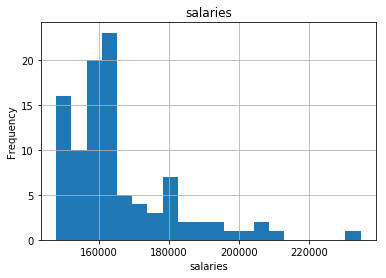

,name,firstName,dept,salary,totalSalary,gender
6894,"Fontana,Gerard T.",Gerard,Boston Fire Department,234578.0,286876.0,male
6571,"Finn,Joseph E.",Joseph,Boston Fire Department,212439.0,212439.0,male
6230,"Evans,William B",William,Boston Police Department,207017.0,207017.0,male
20819,"Walsh,John Francis",John,Boston Fire Department,204893.0,219580.0,male
8009,"Granara,David Richard",David,Boston Fire Department,201219.0,217615.0,male
12172,"MacKin,Gregory J",Gregory,Boston Fire Department,199142.0,258791.0,male
5028,"Dempsey,John",John,Boston Fire Department,194390.0,202106.0,male
12378,"Malone,Scott J",Scott,Boston Fire Department,194323.0,229699.0,male
13485,"McNeil,Stephen D",Stephen,Boston Fire Department,189257.0,222853.0,male
9170,"Hocking,Michael E",Michael,Boston Fire Department,187897.0,259790.0,male


In [48]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

shortForCsv.salary.hist(bins=20)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



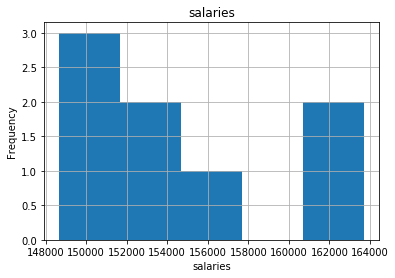

In [53]:

shortForCsv[shortForCsv.gender == "female"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();




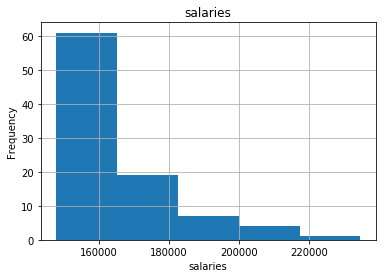

In [54]:
shortForCsv[shortForCsv.gender == "male"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





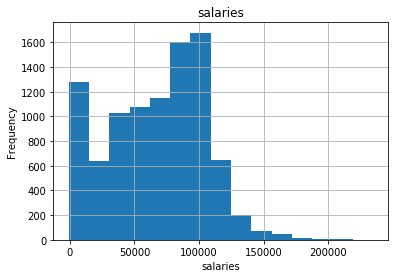

In [57]:
#d_2015
d_2015[d_2015.gender == "male"].salary.hist(bins=15)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





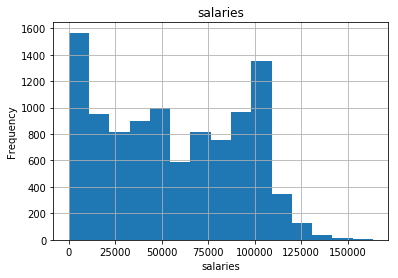

In [58]:
#d_2015
d_2015[d_2015.gender == "female"].salary.hist(bins=15)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





In [59]:
shortForCsv.to_csv("top100_2015", index=False)

In [235]:
import seaborn as sns
#x = shortForCsv["dept"]
#y = shortForCsv["gender"]
sns.lmplot("dept", "gender", data=shortForCsv, fit_reg=False)
#ax = sns.stripplot(x=shortForCsv["dept"])

#d_2016["firstName"] = y
#d_2016["gender"] = gender

TypeError: Could not convert malemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalefemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalemalemalemalemalefemalemalefemalemalefemalefemalemalefemale to numeric

Im going to add mostly female and mostly males to females and males respectively, and group androgynous and unknown into one group...maybe ill use them later 

#trying a second gender dectector
#couldn't geet it to work..
#import gender_guesser.detector as gender
import gender_detector.gender_detector as gender2
#detector = gender_detector('us') # It can also be ar, uk, uy.
gender2.guess('Marcos') # => 'male'
#from gender_detector import GenderDetector
#detector = GenderDetector('us') # It can also be ar, uk, uy.
#detector.guess('Marcos') # => 'male'

In [ ]:
max(pay_2016.regular)

In [ ]:
min(pay_2016.regular)

In [ ]:
x = pay_2016.iloc[:, 0:1]  #all rows, column 1

In [ ]:
x


In [ ]:
plt.plot(x)
plt.show()

In [ ]:
print x.mean(), x.max(), x.min(), x.mode()

In [ ]:
print birds["speed_2d"].mean(), birds["speed_2d"].max(), birds["speed_2d"].min(), birds["speed_2d"].mode()

We'll get started by simply plotting the latitude and longitude of a flight
trajectory for a single bird in a standard two dimensional plot.
Latitude and longitude are coordinates along the surface of a sphere,
where a standard 2-D plot is a plane
so we would expect very strong distortions
for the flight trajectories.
This is especially true because the trajectories
cover a large spatial region.
We're doing this however, primarily to have a quick way to look at the data
and develop more intuition about it.
We'll be doing an actual cartographic projection later in this case study.


ACCESS ONE COLUMN

In [ ]:
#so grab flight trajectories of single bird 
#birds[bird_name == "Eric"] WRONG! maybe works in np or somewhere?
#makes a boolean
ix = birds.bird_name == "Eric" #for pandas this is how to access column


In [ ]:
#one_bird = birds["latitude"]["longitude", "bird_name"]
#so hes using the ix seems to only grab values if they are True, ie Eric
x, y = birds.longitude[ix], birds.latitude[ix]

In [ ]:
birds.longitude[ix].head()

In [ ]:
plt.subplot(211)
plt.plot(x,y,"ob")
plt.subplot(212)
plt.plot(x,y,) #just shows default is prettier
plt.show()

plot more birds...


In [ ]:
birds.bird_name.tail(10)

using unique...

In [ ]:
#but he does something better than this
#ia = birds.bird_name == "Sanne"
#ic = birds.bird_name == "Nico"
names = pd.unique(birds.bird_name)
names

In [ ]:
#having trouble with this, see how he does it below
#he skips making a new dict or list and just puts them in the graph
#latlong = {}
#for i in names:
 #   ix = birds.bird_name == i
  #  x = birds.latitude[ix], 
   # y = birds.longitude[ix]
    #latlong[x] == y

#latlong

In [ ]:
#his example WOW! very cool...
#plt.figure(figsize=(7,7)) # he puts the figure creation outside the loop
#even though  i dont it so blocked it out
for name in names:
    ix = birds.bird_name == name
    x,y = birds.longitude[ix], birds.latitude[ix] #be aware the order you put them in, I had them opposite
    plt.plot(x, y, ".", label=name) #so for the legend to work, have to add the label here! otherwise it just says longitdue...guess the last label available to it
plt.xlabel("Longitude")
plt.ylabel("Latitude") #make sure labels match the data ie x to x and y to latitude
plt.legend(loc="lower right")
plt.show() #im putting this down here and imagine it will work?

In [ ]:
a,b = birds.latitude[ia], birds.longitude[ia]
c,d = birds.latitude[ic], birds.longitude[ic]

In [ ]:
plt.plot(x, y) #this also is quite different from the above, wonder why?
plt.plot(a, b)
plt.plot(c, d)
plt.show()

* Learn how to examine 2D flight speed of the birds
* Learn how to deal with data entries that are not numeric
* The data also contain estimates of two dimensional speeds of the birds.
That is how fast they were flying on a 2D
plane that is a local approximation to the curved surface of the earth.
Let's look at the speed data in a little bit more detail.

In [ ]:
ix = birds.bird_name == "Eric"
speed = birds.speed_2d[ix]
speed


hist doesnt like it when there are null values so the below
doesnt run..until they are eliminated..he starts by doing first 10 rows only, so good idea...

In [ ]:
plt.hist(speed[:10]) 
plt.show()

are there non number objects? ..below are useful tests using numpy

In [ ]:
np.isnan(speed) #i dont see any trues but this is a good way to look
np.isnan(speed).any()#this is much better since it tell us that there is a null value
np.sum(np.isnan(speed)) #sum all the isnans... I got alot more than him??

turn a list to its opposite with ~

In [ ]:
ind = np.isnan(speed)
ind #ind is a true and false list..the NANs are true
~ind #interesting way to get the mirror opposite of ind, the non nans are now TRUE

In [ ]:
#this looks the same as dropna which is less work! interesting to use that idea thought
ind = np.isnan(speed)
plt.hist(speed[~ind])
plt.show()

In [ ]:
#kind of weird looking though..?
# I used dropna here, 
u = speed.dropna()
plt.hist(u)
plt.show()

add x label, y label, and make the bins normalized


### it looks alot better adding more bins
* the y axis is normalized, meaning
that an integral over the histogram would be equal to 1.
* numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]
Return evenly spaced numbers over a specified interval.

In [ ]:
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed = True)
#i see in docs normed has been deprecated so swapping that with "density",
#which doesnt work in python 2
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Pandas 
provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.
Let's look at how we would make the histogram using pandas.

pandas uses the kind and range argument for kind and bin number...all of the nan issue happens under the hood

In [ ]:
birds.speed_2d.plot(kind='hist', range = [0,30]);
plt.xlabel("2D Speed");
plt.show()

## * Learn how deal with timestamped data using datetime
## * Learn how to measure elapsed time

year month and day, are all strings, we're going to  convert them into so-called daytime object, that
supports our arithmetic operations.

In [ ]:
birds.date_time[0:3] 

In [ ]:
import datetime

In [ ]:
datetime.datetime.today()

In [ ]:
time_1 = datetime.datetime.today()

In [ ]:
time_2 = datetime.datetime.today()
time_2

In [ ]:
time_2 - time_1 


the above is called a date time time delta object. he said they all end i 00 but mine doesnt, thogh the data set does

In [ ]:
date_str = birds.date_time[0]

In [ ]:
print date_str, type(date_str)

get rid of the last three characters

In [ ]:
date_str[:-3]

a long way to strip and prep this
this has two arguments, the string you are working on, then the format you want for that string -- it is picky though, if you don't peel off those last 3 digits it won't do it!

In [ ]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

the ooutput above is a datetime object, we can go over every row and create a new datetime object for each row

In [ ]:
#this was taking along time to run so might be messed up

timestamps = []
done = []
for date in birds.date_time:
    new_date = datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")
    new_time = str(new_date)
    timestamps.append(new_time)


In [ ]:
x = str(timestamps[0])

In [ ]:
x